<a href="https://colab.research.google.com/github/arpanastanley24/OIBSIP/blob/main/oibsip_taskno2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAR PRICE PREDICTION**

## **ACKNOWLEDGEMENT**

This dataset is retreived from https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv

## **Problem Statement**
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* Which variables are significant in predicting the price of a car

* How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

## **Business Goal**
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Please Note :** The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.






In [ ]:
#Retreiving the content from the URL
import requests
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv"
response = requests.get(url)
content = response.text

In [ ]:
#Save the retreived content to a CSV file
import csv
csv_file_path = "car_price.csv"  # Specify the path where you want to save the CSV file

# Parse the content and write it to the CSV file
rows = content.splitlines()
csv_writer = csv.writer(open(csv_file_path, "w", newline=""))
for row in rows:
    csv_writer.writerow(row.split(","))

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import the dataset
data = pd.read_csv('/content/drive/MyDrive/car_price.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7775.0
183,184,2,volkswagen 1131 deluxe sedan,gas,std,two,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,7975.0
184,185,2,volkswagen model 111,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7995.0
185,186,2,volkswagen type 3,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8195.0


In [ ]:
#All the columns in the dataset
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
#Data types of features
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
#Removing a variable
df = data.drop(['car_ID'], axis=1)

In [ ]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
#Checking for null values
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

0

In [ ]:
# Extract the name of the car's company from the variable 'CarName' and name it as 'CarCompany'
df['CarCompany'] = df.CarName.apply(lambda x: str(x.split(' ')[0]))

# dropping the variable 'Carname'
df.drop('CarName', axis=1, inplace=True)

#Retrieves the first 5 records
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
#All the columns in the dataset
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarCompany'],
      dtype='object')

In [ ]:
#Checking for the unique values in CarCompany variable
df.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen'], dtype=object)

In [ ]:
np.array(df['CarCompany'])

array(['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi',
       'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw',
       'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet',
       'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge',
       'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar',
       'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick',
       'buick', 'buick', 'buick', 'buick', 'buick', 'mercury',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'Nissan', 'nissan

In [ ]:
# replacing the mis-spelling with correct ones
df.CarCompany.replace('maxda','mazda',inplace=True)
df.CarCompany.replace('porcshce','porsche',inplace=True)
df.CarCompany.replace('toyouta','toyota',inplace=True)
df.CarCompany.replace(['vokswagen','vw'],'volkswagen',inplace=True)
df.CarCompany.replace('Nissan', 'nissan',inplace=True)

In [ ]:
# Checking the unique values in CarCompany variable
df.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen'], dtype=object)

In [ ]:
#Count for each values in the variable 'CarCompany'
df['CarCompany'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
volkswagen      5
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: CarCompany, dtype: int64

<Axes: >

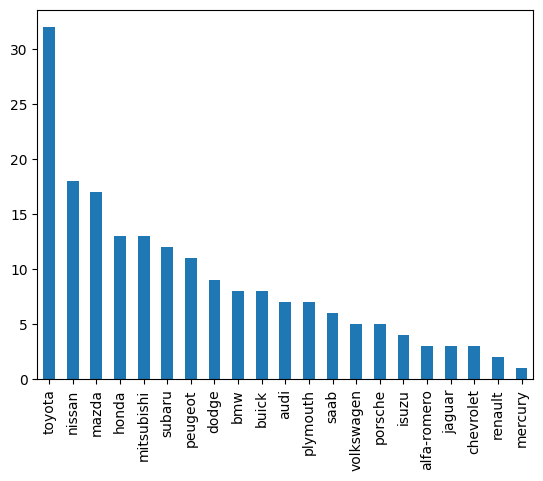

In [ ]:
#Plotting the count for each values in the variable 'CarCompany'
df['CarCompany'].value_counts().plot.bar()

In [ ]:
#Size of the dataset
print("Size of Dataset: {} rows , {} columns".format(df.shape[0],df.shape[1]))

Size of Dataset: 187 rows , 25 columns


In [ ]:
#Placing the target variable in the last column
df=df.assign(price=df.pop('price'))
df.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarCompany,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero,16500.0


In [ ]:
#checking the unique values under "fueltype"
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
#checking the unique values under "aspiration"
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
#checking the unique values under "doornumber"
df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [ ]:
#checking the unique values under "carbody"
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
#checking the unique values under "drivewheel"
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
#checking the unique values under "enginelocation"
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [ ]:
#checking the unique values under "enginetype"
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [ ]:
#checking the unique values under "cylindernumber"
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
#checking the unique values under "fuelsystem"
df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [ ]:
#replacing 'mfi' with 'mpfi' in 'fuelsystem'
df.fuelsystem.replace('mfi','mpfi',inplace=True)

In [ ]:
#checking the unique values under "fuelsystem"
df.fuelsystem.unique()

array(['mpfi', '2bbl', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

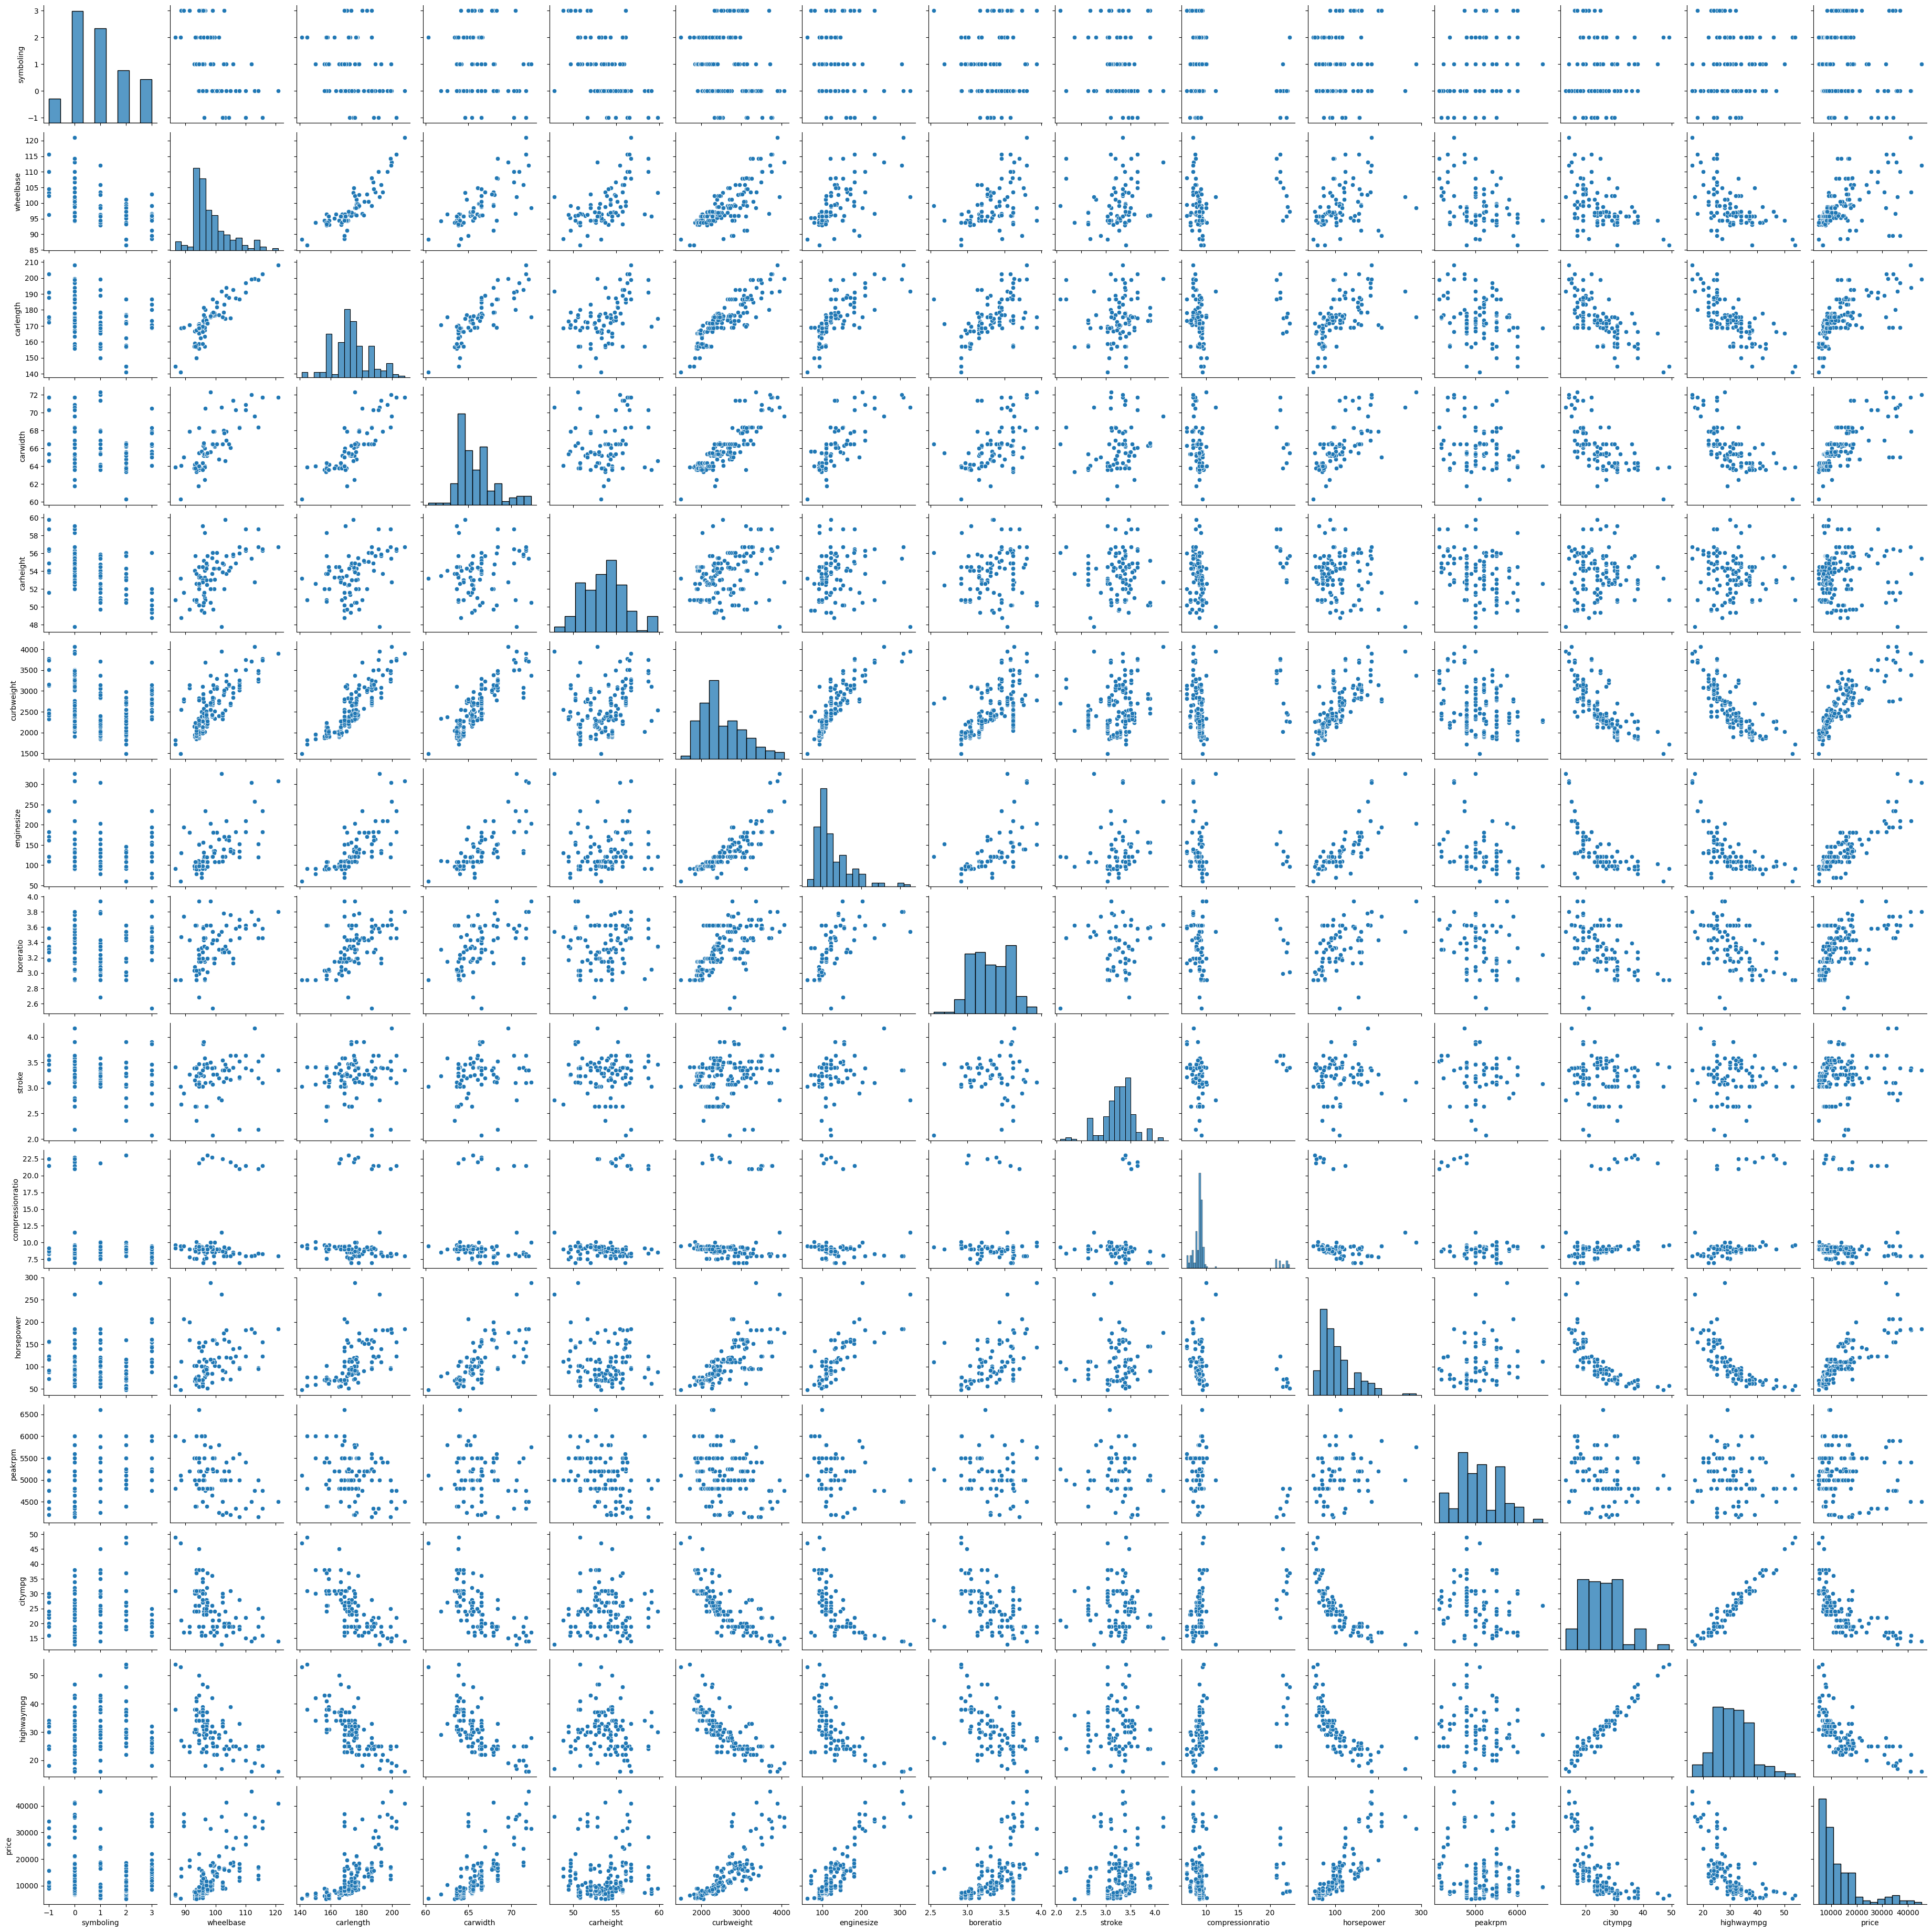

In [ ]:
# pairplot of all numeric variables of dataset 'df'
sns.pairplot(df)
plt.show()

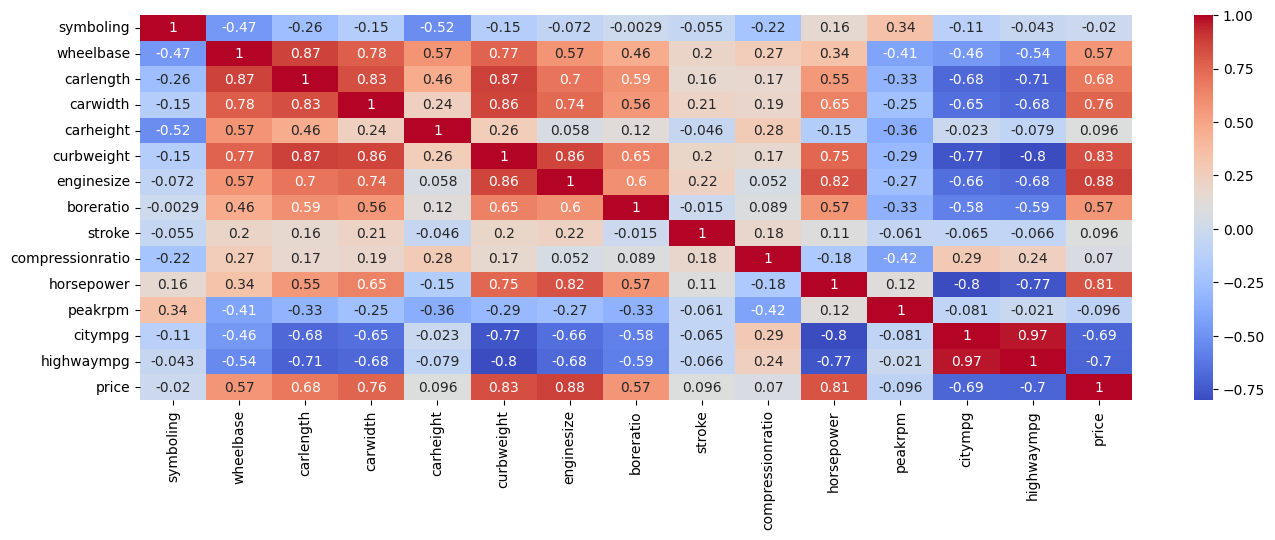

In [ ]:
# plot heatmap to check the correlation coefficients
plt.figure(figsize = (16, 5))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm")
plt.show()

## **INFERENCE**
According to the above plot, the dependent variable '**price**' has a high correlation with the following independent variables:

* enginesize
* curbweight
* horsepower
* carwidth
* carlength

Also there are some indpendent variables with which the dependent variable '**price**' has negative correlation such as follows:

* citympg
* highwaympg


Some of the indepenent variables which have a high correlation with dependent variable '**price**' have a high correlation among them also such as

* enginesize with horsepower
* carwidth and curbweight
* curbweight with enginesize
* carwidth and carlength

This is because of the multicollinearity between the independent variables.

In [ ]:
#combining carlength, carwidth and carheight as car_volume
df["car_volume"] = df["carlength"] * df["carwidth"] * df["carheight"]

#Dropping off the unnecessary variables
df = df.drop(columns=["carlength","carwidth","carheight"])

In [ ]:
#Retrieves the first 10 rows
df.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarCompany,price,car_volume
0,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,3.47,2.68,9.0,111,5000,21,27,alfa-romero,13495.000,528019.904
1,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,3.47,2.68,9.0,111,5000,21,27,alfa-romero,16500.000,528019.904
2,1,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,2.68,3.47,9.0,154,5000,19,26,alfa-romero,16500.000,587592.640
3,2,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,3.19,3.40,10.0,102,5500,24,30,audi,13950.000,634816.956
4,2,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,3.19,3.40,8.0,115,5500,18,22,audi,17450.000,636734.832
5,2,gas,std,two,sedan,fwd,front,99.8,2507,ohc,...,3.19,3.40,8.5,110,5500,19,25,audi,15250.000,624189.969
6,1,gas,std,four,sedan,fwd,front,105.8,2844,ohc,...,3.19,3.40,8.5,110,5500,19,25,audi,17710.000,766364.046
7,1,gas,std,four,wagon,fwd,front,105.8,2954,ohc,...,3.19,3.40,8.5,110,5500,19,25,audi,18920.000,766364.046
8,1,gas,turbo,four,sedan,fwd,front,105.8,3086,ohc,...,3.13,3.40,8.3,140,5500,17,20,audi,23875.000,769115.802
9,0,gas,turbo,two,hatchback,4wd,front,99.5,3053,ohc,...,3.13,3.40,7.0,160,5500,16,22,audi,17859.167,629188.560


In [ ]:
#Placing the target variable in the last column
df=df.assign(price=df.pop('price'))
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarCompany,car_volume,price
0,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,3.47,2.68,9.0,111,5000,21,27,alfa-romero,528019.904,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,3.47,2.68,9.0,111,5000,21,27,alfa-romero,528019.904,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,2.68,3.47,9.0,154,5000,19,26,alfa-romero,587592.640,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,3.19,3.40,10.0,102,5500,24,30,audi,634816.956,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,3.19,3.40,8.0,115,5500,18,22,audi,636734.832,17450.0


# **DATA VISUALIZATION**

<Axes: xlabel='symboling', ylabel='price'>

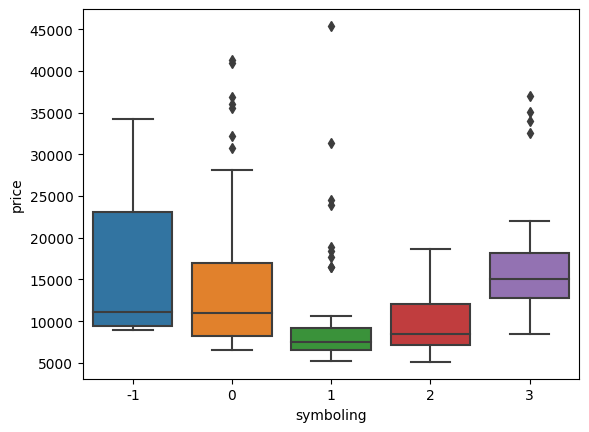

In [ ]:
#Visualising the variable 'symboling' with 'price' through boxplots
sns.boxplot(x = 'symboling', y = 'price', data = df)

The variable '**symboling**' is assigned for insurance risk rating. A value of +3 indicates that the vehicle is risky, -3 that it is probably pretty safe.

Mapping as follows:-

-3,-2,-1: safe

0, 1 : moderate

2, 3 : risky

<Axes: xlabel='fueltype', ylabel='price'>

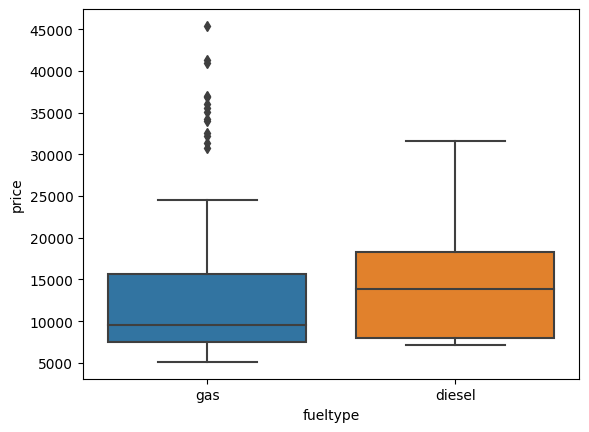

In [ ]:
#Visualising the variable 'fueltype' against 'price' through boxplots
sns.boxplot(x = 'fueltype', y = 'price', data = df)

<Axes: xlabel='aspiration', ylabel='price'>

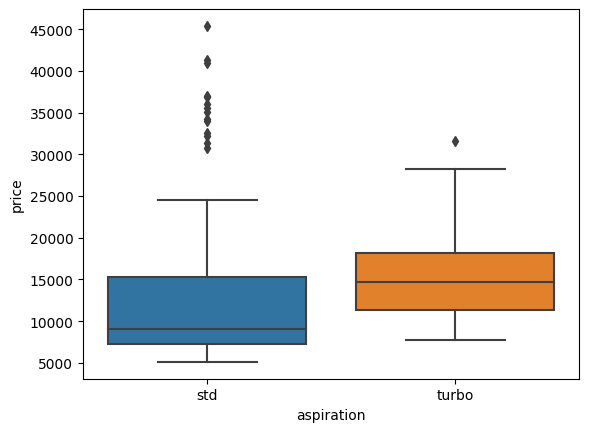

In [ ]:
#Visualising the variable 'aspiration' against 'price' through boxplots
sns.boxplot(x = 'aspiration', y = 'price', data = df)

<Axes: xlabel='doornumber', ylabel='price'>

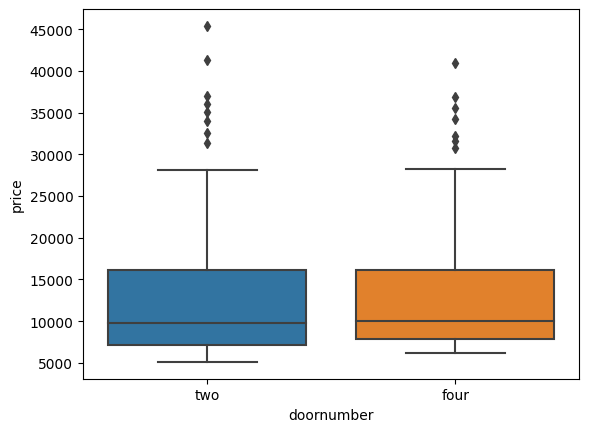

In [ ]:
#Visualising the variable 'doornumber' against 'price' through boxplots
sns.boxplot(x = 'doornumber', y = 'price', data = df)

<Axes: xlabel='carbody', ylabel='price'>

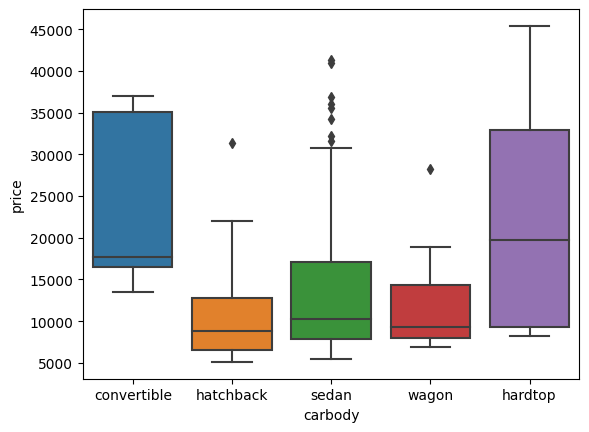

In [ ]:
#Visualising the variable 'carbody' against 'price' through boxplots
sns.boxplot(x = 'carbody', y = 'price', data = df)

<Axes: xlabel='drivewheel', ylabel='price'>

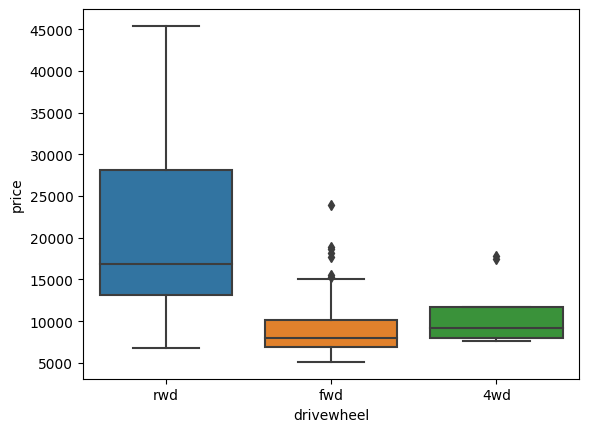

In [ ]:
#Visualising the variable 'drivewheel' against 'price' through boxplots
sns.boxplot(x = 'drivewheel', y = 'price', data = df)

<Axes: xlabel='enginelocation', ylabel='price'>

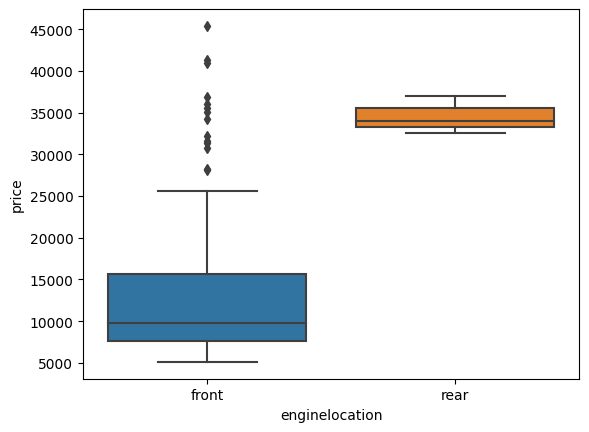

In [ ]:
#Visualising the variable 'enginelocation' against 'price' through boxplots
sns.boxplot(x = 'enginelocation', y = 'price', data = df)

<Axes: xlabel='enginetype', ylabel='price'>

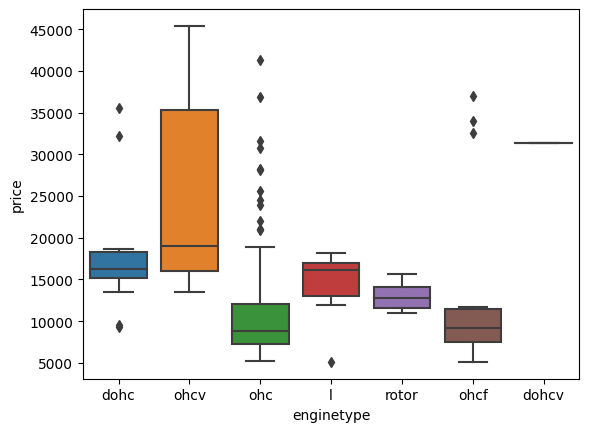

In [ ]:
#Visualising the variable 'enginetype' against 'price' through boxplots
sns.boxplot(x = 'enginetype', y = 'price', data = df)

<Axes: xlabel='cylindernumber', ylabel='price'>

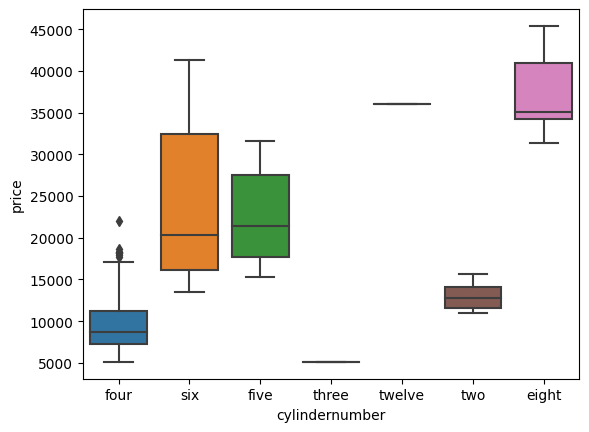

In [ ]:
#Visualising the variable 'cylindernumber' against 'price' through boxplots
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)

<Axes: xlabel='fuelsystem', ylabel='price'>

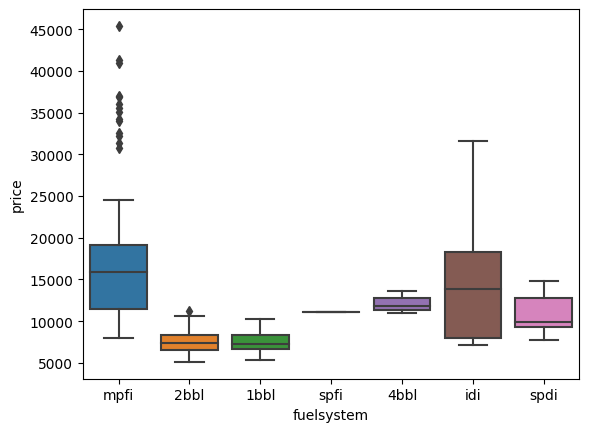

In [ ]:
#Visualising the variable 'fuelsystem' against 'price' through boxplots
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)

# **INFERENCE**
Cars are clearly pricer with:

* less risk i.e. safer insurance
* rear engine location
* high numbers of cylinders

fuel-type and no. of doors don't have much significant impact on price of the car

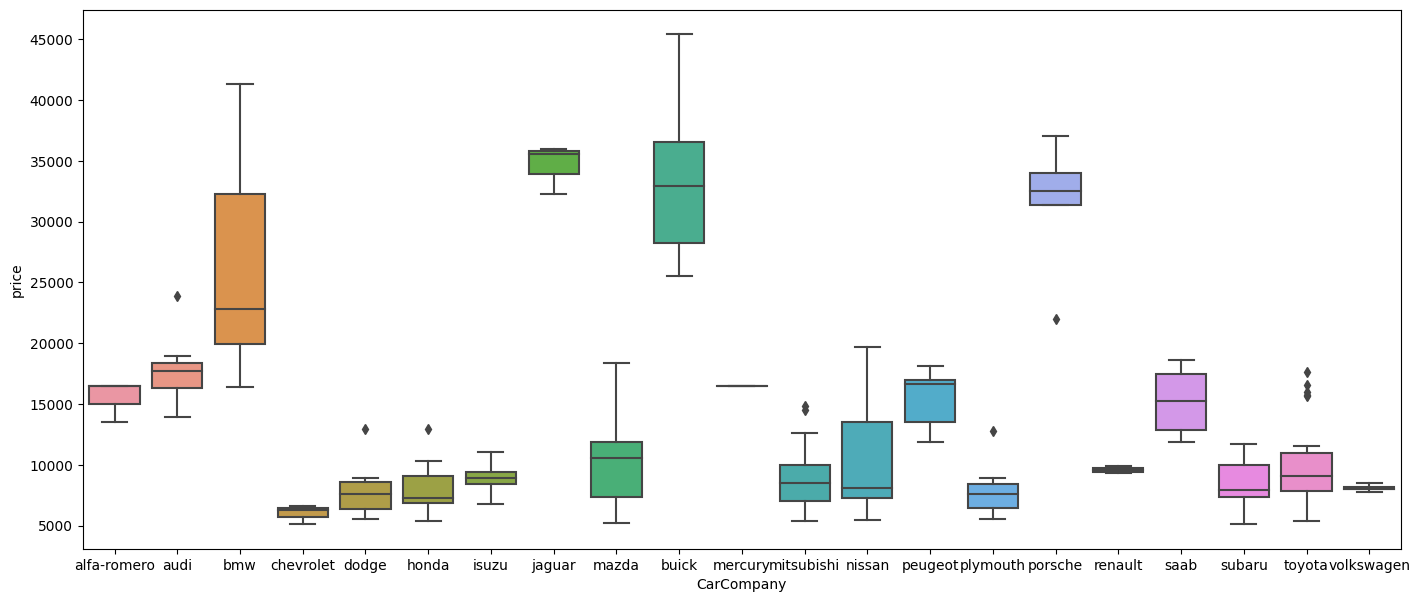

In [ ]:
# Visualising 'CarComapny' variable aginst dependent variable 'price' via boxplot
plt.figure(figsize=(17, 7))
sns.boxplot(x = 'CarCompany', y = 'price', data = df)
plt.show()

# **INFERENCE**
Car's Company seems to have an effect on price such as BMW, Buick, Jaguar and Porsche are higly expensive cars.

Companies have to be divided into buckets of low, medium, high on the basis of the median of their price as due to the presence of the outliers median is the appropriate selection for division.

In [ ]:
#Removing Outliers
numerical_columns = df.select_dtypes(exclude=['object']).columns

def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[~((df[cols] < lower_bound) | (df[cols] > upper_bound)).any(axis=1)]

df = remove_outliers(df, numerical_columns)

In [ ]:
#Mean price of each car company
company_price_mean = dict(df.groupby('CarCompany').price.mean())
company_price_mean

{'alfa-romero': 15498.333333333334,
 'audi': 16656.0,
 'bmw': 19999.0,
 'chevrolet': 6007.0,
 'dodge': 7239.375,
 'honda': 8326.833333333334,
 'isuzu': 8916.5,
 'mazda': 10130.666666666666,
 'mercury': 16503.0,
 'mitsubishi': 7813.0,
 'nissan': 10042.75,
 'peugeot': 14265.0,
 'plymouth': 7163.333333333333,
 'porsche': 22018.0,
 'renault': 9595.0,
 'saab': 15260.0,
 'subaru': 8852.454545454546,
 'toyota': 10041.703703703704,
 'volkswagen': 8221.666666666666}

In [ ]:
df.describe().T.style.background_gradient(cmap='magma')

,count,mean,std,min,25%,50%,75%,max
symboling,139.000000,0.956835,1.075892,-1.000000,0.000000,1.000000,2.000000,3.000000
wheelbase,139.000000,96.850360,3.714140,86.600000,94.500000,96.300000,98.800000,107.900000
curbweight,139.000000,2355.820144,372.652775,1488.000000,2024.000000,2337.000000,2548.000000,3296.000000
enginesize,139.000000,113.330935,25.577217,61.000000,92.000000,108.000000,122.000000,181.000000
boreratio,139.000000,3.261583,0.236135,2.680000,3.050000,3.190000,3.430000,3.940000
stroke,139.000000,3.232086,0.261276,2.640000,3.090000,3.255000,3.400000,3.900000
compressionratio,139.000000,8.959137,0.509277,7.500000,8.700000,9.000000,9.355000,10.100000
horsepower,139.000000,93.618705,27.849595,48.000000,70.000000,86.000000,110.000000,175.000000
peakrpm,139.000000,5168.705036,427.889723,4200.000000,4800.000000,5200.000000,5500.000000,6000.000000
citympg,139.000000,26.244604,5.639973,16.000000,23.000000,26.000000,31.000000,47.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 186
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         139 non-null    int64  
 1   fueltype          139 non-null    object 
 2   aspiration        139 non-null    object 
 3   doornumber        139 non-null    object 
 4   carbody           139 non-null    object 
 5   drivewheel        139 non-null    object 
 6   enginelocation    139 non-null    object 
 7   wheelbase         139 non-null    float64
 8   curbweight        139 non-null    int64  
 9   enginetype        139 non-null    object 
 10  cylindernumber    139 non-null    object 
 11  enginesize        139 non-null    int64  
 12  fuelsystem        139 non-null    object 
 13  boreratio         139 non-null    float64
 14  stroke            139 non-null    float64
 15  compressionratio  139 non-null    float64
 16  horsepower        139 non-null    int64  
 1

# **ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le=LabelEncoder()

df['fueltype'] = le.fit_transform(df['fueltype'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['doornumber'] = le.fit_transform(df['doornumber'])
df['carbody'] = le.fit_transform(df['carbody'])
df['drivewheel'] = le.fit_transform(df['drivewheel'])
df['enginelocation'] = le.fit_transform(df['enginelocation'])
df['enginetype'] = le.fit_transform(df['enginetype'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber'])
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])
df['CarCompany'] = le.fit_transform(df['CarCompany'])

# Print the updated dataframe
print(df)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         0           0           1        0           2   
1            3         0           0           1        0           2   
2            1         0           0           1        2           2   
3            2         0           0           0        3           1   
4            2         0           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
180         -1         0           0           0        3           2   
181         -1         0           0           0        4           2   
183          2         0           0           1        3           1   
185          2         0           0           0        3           1   
186          2         0           0           0        3           1   

     enginelocation  wheelbase  curbweight  enginetype  ...  boreratio  \
0                 0       88.6        2548       

In [ ]:
#Choosing independent variables
x = df.drop("price",axis = 1)
print(x)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         0           0           1        0           2   
1            3         0           0           1        0           2   
2            1         0           0           1        2           2   
3            2         0           0           0        3           1   
4            2         0           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
180         -1         0           0           0        3           2   
181         -1         0           0           0        4           2   
183          2         0           0           1        3           1   
185          2         0           0           0        3           1   
186          2         0           0           0        3           1   

     enginelocation  wheelbase  curbweight  enginetype  ...  fuelsystem  \
0                 0       88.6        2548      

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 186
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         139 non-null    int64  
 1   fueltype          139 non-null    int64  
 2   aspiration        139 non-null    int64  
 3   doornumber        139 non-null    int64  
 4   carbody           139 non-null    int64  
 5   drivewheel        139 non-null    int64  
 6   enginelocation    139 non-null    int64  
 7   wheelbase         139 non-null    float64
 8   curbweight        139 non-null    int64  
 9   enginetype        139 non-null    int64  
 10  cylindernumber    139 non-null    int64  
 11  enginesize        139 non-null    int64  
 12  fuelsystem        139 non-null    int64  
 13  boreratio         139 non-null    float64
 14  stroke            139 non-null    float64
 15  compressionratio  139 non-null    float64
 16  horsepower        139 non-null    int64  
 1

In [ ]:
#Choosing dependent variable
y = df["price"]
np.array(y)

array([13495. , 16500. , 16500. , 13950. , 17450. , 15250. , 17710. ,
       18920. , 16430. , 16925. , 20970. , 21105. , 24565. ,  5151. ,
        6295. ,  6575. ,  5572. ,  6377. ,  7957. ,  6229. ,  6692. ,
        7609. ,  8558. ,  8921. ,  6855. ,  5399. ,  6529. ,  7129. ,
        7295. ,  7295. ,  7895. ,  9095. ,  8845. , 10295. , 12945. ,
       10345. ,  6785. ,  8916.5,  8916.5, 11048. ,  5195. ,  6095. ,
        6795. ,  6695. ,  7395. , 10945. , 11845. , 13645. , 15645. ,
        8845. ,  8495. , 10595. , 10245. , 11245. , 18280. , 16503. ,
        5389. ,  6189. ,  6669. ,  7689. ,  9959. ,  8499. ,  6989. ,
        8189. ,  9279. ,  9279. ,  5499. ,  6649. ,  6849. ,  7349. ,
        7299. ,  7799. ,  7499. ,  7999. ,  8249. ,  8949. ,  9549. ,
       13499. , 14399. , 13499. , 17199. , 18399. , 11900. , 16630. ,
        5572. ,  7957. ,  6229. ,  6692. ,  7609. ,  8921. , 22018. ,
        9295. ,  9895. , 11850. , 12170. , 15510. , 18150. , 18620. ,
        7053. ,  760

# **TRAINING VALIDATION AND TEST SETS**

In [ ]:
#Train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state = 1)

In [ ]:
#Size of the train and test sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(104, 22)
(35, 22)
(104,)
(35,)


# **MODEL BUILDING**

## **LINEAR REGRESSION**

* Linear regression is one of the easiest and most popular Machine Learning algorithms.

* It is a statistical method that is used for predictive analysis.

* Linear regression algorithm shows a linear relationship between a dependent and one or more independent variables.

* Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

In [ ]:
#Building the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

#Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R squared: ',r2_score(y_test,y_pred_lr))
print('MSE: ',(mean_squared_error(y_test,y_pred_lr))**0.5)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred_lr))**0.5)
print('MAE: ',mean_absolute_error(y_test, y_pred_lr))
print('-------------------------------------')
print("Cofficient",lr.coef_)
print("Intercept",lr.intercept_)

R squared:  0.6831558556281616
MSE:  2057.7758576788956
RMSE:  45.36271439937094
MAE:  1618.4115672288276
-------------------------------------
Cofficient [ 1.82450754e+01 -1.36006885e-08  1.53940666e+03 -4.27382739e+01
 -2.98068941e+01  6.82878684e+02 -1.25055521e-12  8.39324800e+01
  6.32098490e+00 -1.42575541e+02  2.64647426e+02 -4.43013704e-01
  5.96547928e+02 -5.16491154e+02 -2.87358682e+03  1.79888676e+03
  1.86816714e+01 -6.31321983e-01 -3.32001101e+02  2.86955789e+02
 -2.53048364e+02  3.68555244e-03]
Intercept -18267.66479757893


## **LASSO REGRESSION**

* LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions.

* The primary goal of LASSO regression is to find a balance between model simplicity and accuracy.

* It achieves this by adding a penalty term to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero.

In [ ]:
#Building the lasso regression model
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)

#Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R squared: ',r2_score(y_test,y_pred_lasso))
print('MSE: ',(mean_squared_error(y_test,y_pred_lasso))**0.5)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred_lr))**0.5)
print('MAE: ',mean_absolute_error(y_test, y_pred_lasso))
print('-------------------------------------')
print("Cofficient",lasso.coef_)
print("Intercept",lasso.intercept_)

R squared:  0.6862249119160542
MSE:  2047.7854603518924
RMSE:  45.36271439937094
MAE:  1612.1562796818455
-------------------------------------
Cofficient [ 1.97235177e+01  0.00000000e+00  1.38886584e+03 -2.58143315e+01
 -1.17891166e+01  6.59501691e+02  0.00000000e+00  8.28842966e+01
  6.37421067e+00 -1.48301348e+02  2.41445955e+02 -2.65357519e+00
  5.98066552e+02 -4.43941076e+02 -2.81068556e+03  1.76235478e+03
  2.08528878e+01 -6.64613161e-01 -3.26900735e+02  2.84494376e+02
 -2.54028717e+02  3.33569332e-03]
Intercept -17998.90244245781


## **RIDGE REGRESSION**

* Ridge regression, also known as L2 regularization is a method to perform linear regression with fewer chances of a model getting into problems such as underfitting or overfitting.

* It is used highly for the treatment of multicollinearity in regression, it means when an independent variable is correlated in such a way that both resemble each other.

* It causes high variance among the independent variables, we can change the value of the independent variable but it will cause a loss of information.

In [ ]:
#Building the ridge regression model
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)

#Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R squared: ',r2_score(y_test,y_pred_ridge))
print('MSE: ',(mean_squared_error(y_test,y_pred_ridge))**0.5)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred_lr))**0.5)
print('MAE: ',mean_absolute_error(y_test, y_pred_ridge))
print('-------------------------------------')
print("Cofficient",ridge.coef_)
print("Intercept",ridge.intercept_)

R squared:  0.7051733892334261
MSE:  1984.9911051204604
RMSE:  45.36271439937094
MAE:  1554.0650673912867
-------------------------------------
Cofficient [ 9.25364981e+01  0.00000000e+00  5.27841460e+02 -5.98226676e+01
  8.31607248e+01  5.57973132e+02  0.00000000e+00  7.49013154e+01
  6.75563499e+00 -1.82691021e+02  1.12741969e+02 -1.77421499e+01
  5.69526279e+02 -1.09176655e+02 -2.14245786e+03  1.49152666e+03
  3.48906190e+01 -9.88221306e-01 -2.76832788e+02  2.51198425e+02
 -2.59899363e+02  1.15820502e-03]
Intercept -15593.405076449706


## **ELASTIC NET REGRESSION**

* Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models.

* The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [ ]:
#Building the linear regression model
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(x_train,y_train)
y_pred_en = en.predict(x_test)

#Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R squared: ',r2_score(y_test,y_pred_en))
print('MSE: ',(mean_squared_error(y_test,y_pred_en))**0.5)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred_lr))**0.5)
print('MAE: ',mean_absolute_error(y_test, y_pred_en))
print('-------------------------------------')
print("Cofficient",en.coef_)
print("Intercept",en.intercept_)

R squared:  0.6905249602151209
MSE:  2033.7053857158046
RMSE:  45.36271439937094
MAE:  1512.9248399294818
-------------------------------------
Cofficient [ 2.34174773e+02  0.00000000e+00 -9.90351477e+01 -3.77890591e+01
  4.27055474e+01  2.07272900e+02  0.00000000e+00  3.59280194e+01
  8.26859619e+00 -1.15204032e+02  6.77828696e+01 -3.70971623e+01
  2.13658480e+02  3.54674135e+01 -2.10531669e+02  3.88757013e+02
  5.31616646e+01 -1.39908809e+00 -8.59532089e+01  1.27978542e+02
 -2.54803505e+02  1.18004056e-04]
Intercept -9046.680215431423


### **Ridge regression performs with the highest accuracy**

# **HYPERPARAMETER TUNING**

## **RIDGE REGRESSION**

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],  # Solver algorithm
}

# Perform grid search with cross-validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)
print(f"Best score: {grid_search.best_score_:.4f}")

Best Parameters:  {'alpha': 10.0, 'solver': 'svd'}
Best score: 0.6801


# **FINAL MODEL**

In [ ]:
#Building the ridge regression model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10, solver='svd')
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)

#Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R squared: ',r2_score(y_test,y_pred_ridge))
print('MSE: ',(mean_squared_error(y_test,y_pred_ridge))**0.5)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred_lr))**0.5)
print('MAE: ',mean_absolute_error(y_test, y_pred_ridge))
print('-------------------------------------')
print("Cofficient",ridge.coef_)
print("Intercept",ridge.intercept_)

R squared:  0.7098364020030239
MSE:  1969.2311134815593
RMSE:  45.36271439937094
MAE:  1490.3541387466403
-------------------------------------
Cofficient [ 2.45439545e+02 -2.25806911e-09 -1.36301231e+02 -1.13132005e+02
  1.48763458e+02  4.00734628e+02 -4.18321303e-13  5.44129341e+01
  7.65296221e+00 -1.84677289e+02  3.93720890e+01 -3.53718121e+01
  4.04433470e+02  1.06208697e+02 -7.76269755e+02  9.26368527e+02
  4.94896077e+01 -1.45319939e+00 -1.64779911e+02  1.75851944e+02
 -2.63556102e+02 -5.75319717e-04]
Intercept -11827.243942980791
